In [20]:
## Questions to Answer

# Is temperature rising over time? 
# Is there a relationship between rising temperatures and natural disasters?
# Is there a relationship between rising temperatures and costs of natural disasters?
# Is there a relationship between rising temperatures and sea level rise?

In [21]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import pandas as pd
from pprint import pprint

In [22]:
disaster_data = "Resources/disaster_cost_count.csv"
disaster_df = pd.read_csv(disaster_data)

#load resource file
natural_disaster_file = "Resources/State Time Series 1980-2020.csv"

#Read file and store it in a data frame
disaster_data_df = pd.read_csv(natural_disaster_file)

#temperature data
file_load = "Resources/ave_temp_usa_year.csv"

temp_avg_year = pd.read_csv(file_load)

temp_avg_year.head()

temp_avg_year.info()


#average temp data
average_temp_year = "Resources/average_temp_by_year.csv"
average_temp_year = pd.read_csv(average_temp_year)

#sea level rise data
sea_level_rise = "Resources/sea_rise.csv"
sea_level_rise_df = pd.read_csv(sea_level_rise)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1    Year                    1392 non-null   int64  
 2    Statistics              1392 non-null   object 
 3    Country                 1392 non-null   object 
 4    ISO3                    1392 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 54.5+ KB


In [23]:
#convert celsius to farneheight 
#formula=(0°C × 9/5) + 32

to_faren = (temp_avg_year["Temperature - (Celsius)"] * (9/5)) + 32

#to_faren

In [24]:
#append temps in deg farenheight to df 

farenheight = []

for f in to_faren:
    
    farenheight.append(f)


#print(farenheight)

In [25]:
temp_avg_year["Temp F"] = farenheight

#temp_avg_year.head()

#round farenheight

temp_avg_year = temp_avg_year.round({'Temp F': 2})

temp_avg_year

,Temperature - (Celsius),Year,Statistics,Country,ISO3,Temp F
0,-5.71120,1901,Jan Average,United States,USA,21.72
1,-6.55770,1901,Feb Average,United States,USA,20.20
2,-0.00450,1901,Mar Average,United States,USA,31.99
3,4.78677,1901,Apr Average,United States,USA,40.62
4,12.08400,1901,May Average,United States,USA,53.75
...,...,...,...,...,...,...
1387,20.18120,2016,Aug Average,United States,USA,68.33
1388,16.01500,2016,Sep Average,United States,USA,60.83
1389,10.18930,2016,Oct Average,United States,USA,50.34
1390,3.36611,2016,Nov Average,United States,USA,38.06


In [26]:
#rename columns---columns appear to have spaces

temp_avg_year = temp_avg_year.rename(columns={" Year": "Year", " Statistics": "Month"})

#clean up df 

temp_avg_year = temp_avg_year[['Year','Month','Temp F']]

temp_avg_year

,Year,Month,Temp F
0,1901,Jan Average,21.72
1,1901,Feb Average,20.20
2,1901,Mar Average,31.99
3,1901,Apr Average,40.62
4,1901,May Average,53.75
...,...,...,...
1387,2016,Aug Average,68.33
1388,2016,Sep Average,60.83
1389,2016,Oct Average,50.34
1390,2016,Nov Average,38.06


In [27]:
#avg temp by year variable 

temp_group = temp_avg_year.groupby("Year")

temp_mean_year = temp_group["Temp F"].mean()

temp_mean_year=pd.DataFrame(temp_mean_year)

#temp_mean_year

#get distinct years into an array so they have same value counts as temp_mean_year (this is so you can plot it below) (116 rows)

years=[]

for year in temp_avg_year:
    
    years.append(temp_avg_year["Year"])
    
    

years[0]

years = years[0].unique()

#years


Text(0.5, 1.0, 'Average Temp in US 1905-2016')

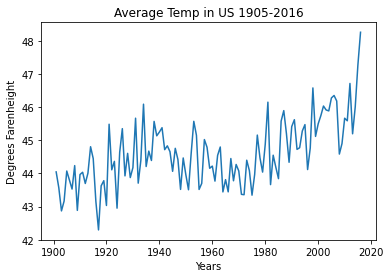

In [28]:
#plot the avg temp in US 

plt.plot(years, temp_mean_year)

plt.xlabel("Years")
plt.ylabel("Degrees Farenheight")
plt.title("Average Temp in US 1905-2016")

In [29]:
#bin into seasons, get avg change by year by season- 4 charts 

month_bin = [month%12 // 3 + 1 for month in range(1, 13)]

months = temp_avg_year["Month"].unique()

months = months.tolist()

#have two equal lists for months and seasons, convert to df 
seasons = pd.DataFrame({"Month": months, "Seasons": month_bin})

seasons = seasons.set_index("Month")

seasons

,Seasons
Month,
Jan Average,1
Feb Average,1
Mar Average,2
Apr Average,2
May Average,2
Jun Average,3
Jul Average,3
Aug Average,3
Sep Average,4


In [30]:
#merge dfs to get the seasons into our df 

avg_temp_seasons = temp_avg_year.merge(seasons, on='Month')

avg_temp_seasons

#convert seasons to string: 

avg_temp_seasons['Seasons']= avg_temp_seasons['Seasons'].map(str)

avg_temp_seasons

,Year,Month,Temp F,Seasons
0,1901,Jan Average,21.72,1
1,1902,Jan Average,21.61,1
2,1903,Jan Average,20.01,1
3,1904,Jan Average,17.84,1
4,1905,Jan Average,20.13,1
...,...,...,...,...
1387,2012,Dec Average,25.40,1
1388,2013,Dec Average,22.77,1
1389,2014,Dec Average,29.85,1
1390,2015,Dec Average,29.43,1


Text(0.5, 1.0, 'US Temp Avg: Winter 1901-2016')

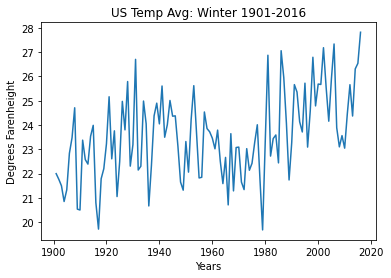

In [31]:
#get df for only winter data 

avg_temp_winter = avg_temp_seasons.loc[avg_temp_seasons['Seasons'] =='1']

avg_temp_winter


#plot winter data 

temp_group_winter = avg_temp_winter.groupby("Year")

temp_mean_winter = temp_group_winter["Temp F"].mean()

temp_mean_winter=pd.DataFrame(temp_mean_winter)

temp_mean_winter

plt.plot(years, temp_mean_winter)

plt.xlabel("Years")
plt.ylabel("Degrees Farenheight")
plt.title("US Temp Avg: Winter 1901-2016")

Text(0.5, 1.0, 'US Temp Avg: Spring 1901-2016')

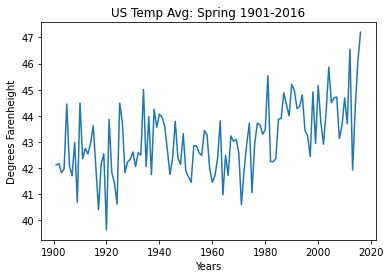

In [32]:
#get df for only spring data 

avg_temp_spring = avg_temp_seasons.loc[avg_temp_seasons['Seasons'] =='2']

avg_temp_spring


#plot spring data 

temp_group_spring = avg_temp_spring.groupby("Year")

temp_group_spring = temp_group_spring["Temp F"].mean()

temp_group_spring=pd.DataFrame(temp_group_spring)

temp_group_spring



plt.plot(years, temp_group_spring)

plt.xlabel("Years")
plt.ylabel("Degrees Farenheight")
plt.title("US Temp Avg: Spring 1901-2016")

Text(0.5, 1.0, 'US Temp Avg: Summer 1901-2016')

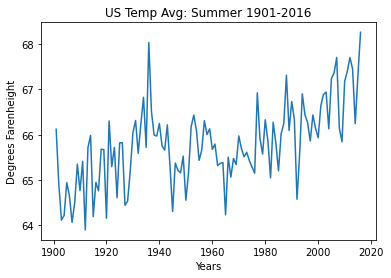

In [33]:
#get df for only summer data 

avg_temp_summer = avg_temp_seasons.loc[avg_temp_seasons['Seasons'] =='3']

avg_temp_summer


#plot summer data 

temp_group_summer = avg_temp_summer.groupby("Year")

temp_group_summer = temp_group_summer["Temp F"].mean()

temp_group_summer=pd.DataFrame(temp_group_summer)

temp_group_summer



plt.plot(years, temp_group_summer)

plt.xlabel("Years")
plt.ylabel("Degrees Farenheight")
plt.title("US Temp Avg: Summer 1901-2016")

Text(0.5, 1.0, 'US Temp Avg: Fall 1901-2016')

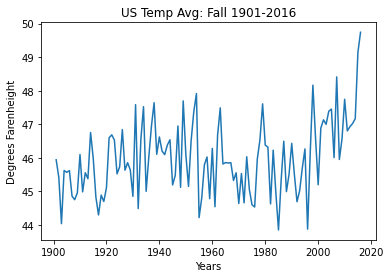

In [34]:
#get df for only Fall data 

avg_temp_fall = avg_temp_seasons.loc[avg_temp_seasons['Seasons'] =='4']

avg_temp_fall


#plot Fall data 

temp_group_fall = avg_temp_fall.groupby("Year")

temp_group_fall = temp_group_fall["Temp F"].mean()

temp_group_fall=pd.DataFrame(temp_group_fall)

temp_group_fall



plt.plot(years, temp_group_fall)

plt.xlabel("Years")
plt.ylabel("Degrees Farenheight")
plt.title("US Temp Avg: Fall 1901-2016")

In [35]:
#average temp by year with average as compared to mean
avg_temp_by_year = average_temp_year[["Year", "Yearly Average"]]

avg_temp_by_year_cleaned = avg_temp_by_year.drop(avg_temp_by_year.index[0:100])
avg_temp_by_year_cleaned
average_temperature_by_year_df = avg_temp_by_year_cleaned.set_index('Year')
average_temperature_by_year_df

,Yearly Average
Year,
1980,0.26
1981,0.32
1982,0.14
1983,0.31
1984,0.16
1985,0.12
1986,0.18
1987,0.32
1988,0.39


In [36]:
#Dataframe: Average Temp through 2013

average_temperature_index = average_temperature_by_year_df.reset_index()
average_temperature_index
average_temperature_by_2013 = average_temperature_index.drop(average_temperature_index.index[34:41])

average_temperature_by_2013

#DataFrame: Sea Level Rise (Inches)
sea_level_rise_cleaned1 = sea_level_rise_df.drop(avg_temp_by_year.index[0:100])
sea_level_rise_cleaned2 = sea_level_rise_cleaned1.drop(avg_temp_by_year.index[134:136])


sea_level_rise_cleaned2[["Year", "CSIRO - Adjusted sea level (inches)"]]
sea_level_rise_cleaned2['Year'] = sea_level_rise_cleaned2['Year'].map("{:.0f}".format)
sea_level_rise_cleaned2['CSIRO - Adjusted sea level (inches)'] = sea_level_rise_cleaned2['CSIRO - Adjusted sea level (inches)'].map("{:.2f}".format)
sea_level_rise_cleaned2[["Year", "CSIRO - Adjusted sea level (inches)"]]
sea_level_rise_cleaned3 = sea_level_rise_cleaned2[["Year", "CSIRO - Adjusted sea level (inches)"]]
sea_level_rise_final_df = sea_level_rise_cleaned3.set_index('Year')
sea_level_rise_final_df

slr_no_index = sea_level_rise_final_df.reset_index()

slr_alone = slr_no_index[["CSIRO - Adjusted sea level (inches)"]]
slr_alone




slr_temp_merged = pd.DataFrame({
                                "Year" : average_temperature_by_2013["Year"],
                                "Average Temp": average_temperature_by_2013["Yearly Average"],
                                "Sea Level Rise (Inches)": slr_alone["CSIRO - Adjusted sea level (inches)"]
                                })
slr_temp_merged

#DataFrame: Sea Level Rise with Temp Increases by Year

slr_merged_by_year = slr_temp_merged.set_index("Year")
slr_merged_by_year

slr_merged_by_year["Average Temp"] = pd.to_numeric(slr_merged_by_year["Average Temp"])
slr_merged_by_year["Sea Level Rise (Inches)"] = pd.to_numeric(slr_merged_by_year["Sea Level Rise (Inches)"])

In [37]:
#create df of disaster costs
total_disaster_cost = disaster_df[["Year","Drought Cost","Flooding Cost","Freeze Cost","Severe Storm Cost","Tropical Cyclone Cost","Wildfire Cost","Winter Storm Cost","All Disasters Cost"]]
total_disaster_cost = disaster_df.set_index("Year")
total_disaster_cost

,Drought Count,Drought Cost,Flooding Count,Flooding Cost,Freeze Count,Freeze Cost,Severe Storm Count,Severe Storm Cost,Tropical Cyclone Count,Tropical Cyclone Cost,Wildfire Count,Wildfire Cost,Winter Storm Count,Winter Storm Cost,All Disasters Count,All Disasters Cost
Year,,,,,,,,,,,,,,,,
1980,1,33.5,1,2.4,0,0.0,0,0.0,1,2.0,0,0.0,0,0.0,3,37.9
1981,0,0.0,0,0.0,1,1.7,1,1.2,0,0.0,0,0.0,0,0.0,2,2.9
1982,0,0.0,0,0.0,0,0.0,2,2.6,0,0.0,0,0.0,1,1.8,3,4.4
1983,1,7.9,2,8.3,1,5.3,0,0.0,1,8.0,0,0.0,0,0.0,5,29.5
1984,0,0.0,0,0.0,0,0.0,2,2.6,0,0.0,0,0.0,0,0.0,2,2.6
1985,0,0.0,1,3.3,1,3.0,0,0.0,3,9.0,0,0.0,1,2.1,6,17.4
1986,1,4.3,0,0.0,0,0.0,1,1.3,0,0.0,0,0.0,0,0.0,2,5.6
1987,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1988,1,45.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,45.0


In [38]:
#crate df of disaster count
disaster_count_df = disaster_data_df[["Year","State","Drought Count","Flooding Count", "Freeze Count",
                                    "Severe Storm Count", "Tropical Cyclone Count", "Wildfire Count",
                                    "Winter Storm Count", "All Disasters Count"]]
#disaster_count_df

In [39]:
disaster_group = disaster_count_df.groupby("Year")

#get the sum of all disasters by year
disasters_total = disaster_group["All Disasters Count"].sum()

#get the sum of each disaster by year
droughts_total = disaster_group["Drought Count"].sum()
floods_total = disaster_group["Flooding Count"].sum()
freeze_total = disaster_group["Freeze Count"].sum()
severestorm_total = disaster_group["Severe Storm Count"].sum()
cyclone_total = disaster_group["Tropical Cyclone Count"].sum()
wildfire_total = disaster_group["Wildfire Count"].sum()
winter_storm_total = disaster_group["Winter Storm Count"].sum()

#create a df of disasters by year
yearly_disaster_df = pd.DataFrame({"Total Disasters":disasters_total,
                                  "Droughts":droughts_total,
                                  "Floods":floods_total,
                                  "Freezes":freeze_total,
                                  "Severe Storms":severestorm_total,
                                  "Cyclones":cyclone_total,
                                  "Wildfires":wildfire_total,
                                  "Winter Storms":winter_storm_total})
yearly_disaster_df

,Total Disasters,Droughts,Floods,Freezes,Severe Storms,Cyclones,Wildfires,Winter Storms
Year,,,,,,,,
1980,25,20,3,0,0,2,0,0
1981,6,0,0,1,5,0,0,0
1982,66,0,0,0,32,0,0,34
1983,64,11,12,40,0,1,0,0
1984,17,0,0,0,17,0,0,0
1985,54,0,4,1,0,21,0,28
1986,14,9,0,0,5,0,0,0
1987,0,0,0,0,0,0,0,0
1988,24,24,0,0,0,0,0,0


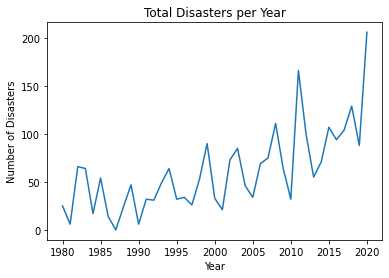

In [40]:
#create line plot x-axis year, y-axis number of disasters
x_axis_data = disaster_data_df["Year"].unique()
disaster_data = yearly_disaster_df["Total Disasters"]
plt.plot(x_axis_data, disaster_data)

#give graph axis titles
plt.title("Total Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")

plt.show()

In [41]:
state_group = disaster_count_df.groupby("State")

#get the sum of all disasters by state
state_disasters = state_group["All Disasters Count"].sum()

#get the sum of each disaster by state
state_droughts = state_group["Drought Count"].sum()
state_floods = state_group["Flooding Count"].sum()
state_freeze = state_group["Freeze Count"].sum()
state_severestorm = state_group["Severe Storm Count"].sum()
state_cyclone = state_group["Tropical Cyclone Count"].sum()
state_wildfire = state_group["Wildfire Count"].sum()
state_winter_storm = state_group["Winter Storm Count"].sum()

#create a df of disasters by year
state_disaster_df = pd.DataFrame({"Total Disasters":state_disasters,
                                  "Droughts":state_droughts,
                                  "Floods":state_floods,
                                  "Freezes":state_freeze,
                                  "Severe Storms":state_severestorm,
                                  "Cyclones":state_cyclone,
                                  "Wildfires":state_wildfire,
                                  "Winter Storms":state_winter_storm})
state_disaster_df

,Total Disasters,Droughts,Floods,Freezes,Severe Storms,Cyclones,Wildfires,Winter Storms
State,,,,,,,,
AK,7,0,0,0,0,0,7,0
AL,91,15,2,3,40,21,2,8
AR,74,14,9,2,39,4,0,6
AZ,26,12,1,0,1,0,12,0
CA,39,12,4,3,4,0,16,0
CO,52,13,2,1,26,0,10,0
CT,34,1,1,1,10,7,0,14
DE,29,5,1,1,5,7,0,10
FL,65,7,2,5,17,25,4,5


In [42]:
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$filter=declarationDate ge '1980-01-01T04:00:00.000z' and state eq 'FL' and endswith(declarationTitle,'ING')"
disaster_request = requests.get(url).json()
#pprint(disaster_request)
#pprint(disaster_request['DisasterDeclarationsSummaries'])

In [43]:
#Count the number of disasters by year

number_disasters = len(disaster_request['DisasterDeclarationsSummaries'])
print(f"There are {number_disasters} disasters.")

# The number of records returned is limitted to 1000.

There are 154 disasters.


In [44]:

# Pull out the Year, Type of disaster and State

summaries = disaster_request["DisasterDeclarationsSummaries"]

dates = []
types = []
state = []

for summary in summaries:
    #print(summary['declarationDate'])
    dates.append(summary['fyDeclared'])
    types.append(summary['declarationTitle'])
    state.append(summary['state'])
disasters_df = pd.DataFrame({"Year": dates,
                            "Disaster Type": types,
                             "State": state
                            })

disasters_df.head(20)
#print(disaster_request["DisasterDeclarationsSummaries"][0]['declarationDate'])

,Year,Disaster Type,State
0,1982,SEVERE STORMS AND FLOODING,FL
1,1982,SEVERE STORMS AND FLOODING,FL
2,1982,SEVERE STORMS AND FLOODING,FL
3,1982,SEVERE STORMS AND FLOODING,FL
4,1990,SEVERE STORMS & FLOODING,FL
5,1990,SEVERE STORMS & FLOODING,FL
6,1990,SEVERE STORMS & FLOODING,FL
7,1990,SEVERE STORMS & FLOODING,FL
8,1990,SEVERE STORMS & FLOODING,FL
9,1990,SEVERE STORMS & FLOODING,FL


In [45]:
#Count the number of disasters 
count_gb = disasters_df.groupby("Year")
total_by_year = count_gb["Disaster Type"].count()
total_by_year

Year
1982     4
1990    11
1992     4
1993    45
1996     3
1998    58
2001     4
2003    11
2007     1
2013     4
2014     9
Name: Disaster Type, dtype: int64

In [46]:
#FL pie chart

In [47]:
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$filter=declarationDate ge '1980-01-01T04:00:00.000z' and state eq 'AZ'"

disaster_request = requests.get(url).json()
#pprint(disaster_request)
#pprint(disaster_request['DisasterDeclarationsSummaries'])


In [48]:
# Count the number of disasters by year

number_disasters = len(disaster_request['DisasterDeclarationsSummaries'])
print(f"There are {number_disasters} disasters.")

There are 280 disasters.


In [49]:
#Pull out the year, type of disaster and state

summaries = disaster_request["DisasterDeclarationsSummaries"]

dates = []
types = []
state = []
title = []

for summary in summaries:
    #print(summary['declarationDate'])
    dates.append(summary['fyDeclared'])
    types.append(summary['incidentType'])
    state.append(summary['state'])
    title.append(summary['declarationTitle'])
disasters_df = pd.DataFrame({"Year": dates,
                            "Disaster Type": types,
                             "Title": title,
                             "State": state
                            })

disasters_df.head(50)

,Year,Disaster Type,Title,State
0,1980,Flood,SEVERE STORMS & FLOODING,AZ
1,1980,Flood,SEVERE STORMS & FLOODING,AZ
2,1980,Flood,SEVERE STORMS & FLOODING,AZ
3,1980,Flood,SEVERE STORMS & FLOODING,AZ
4,1980,Flood,SEVERE STORMS & FLOODING,AZ
5,1983,Flood,FLOODING,AZ
6,1983,Flood,FLOODING,AZ
7,1983,Flood,FLOODING,AZ
8,1984,Flood,SEVERE STORMS & FLOODING,AZ
9,1984,Flood,SEVERE STORMS & FLOODING,AZ


In [50]:
#Count the number of disasters 
count_gb = disasters_df.groupby("Year")
total_by_year = count_gb["Disaster Type"].count()
total_by_year

Year
1980     5
1983     3
1984    11
1985     2
1990     1
1991     8
1993    17
1994     5
1995     2
1996     3
1999     2
2000     2
2001     8
2002    10
2003     7
2004     3
2005    43
2006    15
2008     1
2009     2
2010    22
2011     7
2013     4
2015     5
2016     1
2017     3
2018     3
2019     3
2020    82
Name: Disaster Type, dtype: int64

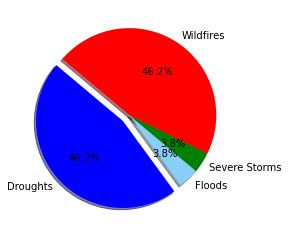

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

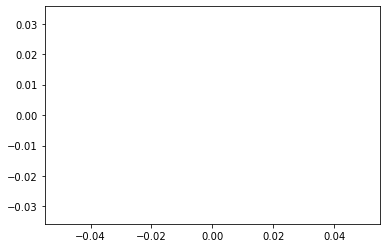

In [51]:
#create pie chart of billion dollar Arizona disasters

# Labels for the sections of our pie chart
labels = ["Droughts","Floods","Severe Storms","Wildfires"]

# The values of each section of the pie chart
disaster_count = [12,1,1,12]

# The colors of each section of the pie chart
colors= ["blue","lightskyblue","green","red"]

# Tells matplotlib to seperate the "Droughts" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(disaster_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()
plt.axis("equal")

In [52]:
#What is the mean????????????

totals_by_year = pd.DataFrame({"Average Temp from Mean": average_temperature_by_year_df["Yearly Average"],
                               "Total Disasters": yearly_disaster_df["Total Disasters"],
                               "Total Cost":total_disaster_cost["All Disasters Cost"]
                              })
totals_by_year

,Average Temp from Mean,Total Disasters,Total Cost
Year,,,
1980,0.26,25,37.9
1981,0.32,6,2.9
1982,0.14,66,4.4
1983,0.31,64,29.5
1984,0.16,17,2.6
1985,0.12,54,17.4
1986,0.18,14,5.6
1987,0.32,0,0.0
1988,0.39,24,45.0


The r-squared is: 0.3933161009461637


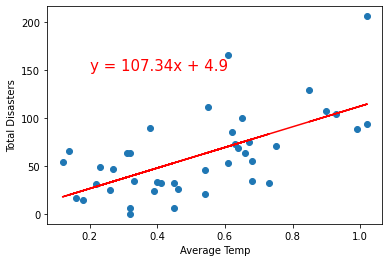

In [53]:
# #linear regression total disaster count and temp

x_values =totals_by_year['Average Temp from Mean']
y_values = totals_by_year['Total Disasters']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.2,150),fontsize=15,color="red")
plt.xlabel('Average Temp')
plt.ylabel('Total Disasters')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.18099170568878947


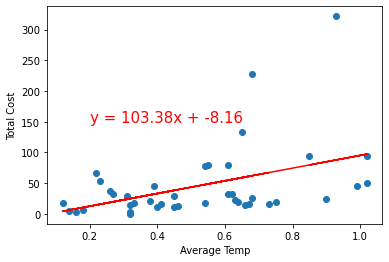

In [54]:
# #linear regression total disaster count and temp

x_values =totals_by_year['Average Temp from Mean']
y_values = totals_by_year['Total Cost']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.2,150),fontsize=15,color="red")
plt.xlabel('Average Temp')
plt.ylabel('Total Cost')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [55]:
# totals_by_year.reset_index(inplace=True)

# #temp and total cost
# temp = totals_by_year['Average Temp from Mean']
# cost = totals_by_year['Total Cost']
# index = totals_by_year['Year']
# df = pd.DataFrame({'Temp': temp,
#                    'Cost': cost}, index=index)
# ax = df.plot.bar()

In [56]:
url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$filter=declarationDate ge '1980-01-01T04:00:00.000z' and state eq 'AZ'"

disaster_request = requests.get(url).json()
#disasters = disaster_request[2]
#pprint(disaster_request)

In [57]:
# Count the number of disasters by year

number_disasters = len(disaster_request['DisasterDeclarationsSummaries'])
print(f"There are {number_disasters} disasters.")

# The number of records returned is limitted to 1000.

There are 280 disasters.


In [58]:

# Pull out the Year, Type of disaster and State

summaries = disaster_request["DisasterDeclarationsSummaries"]

dates = []
types = []
state = []
title = []

for summary in summaries:
    #print(summary['declarationDate'])
    dates.append(summary['fyDeclared'])
    types.append(summary['incidentType'])
    state.append(summary['state'])
    title.append(summary['declarationTitle'])
disasters_df = pd.DataFrame({"Year": dates,
                            "Disaster Type": types,
                             "Title": title,
                             "State": state
                            })

disasters_df.head(50)
#print(disaster_request["DisasterDeclarationsSummaries"][0]['declarationDate'])

,Year,Disaster Type,Title,State
0,1980,Flood,SEVERE STORMS & FLOODING,AZ
1,1980,Flood,SEVERE STORMS & FLOODING,AZ
2,1980,Flood,SEVERE STORMS & FLOODING,AZ
3,1980,Flood,SEVERE STORMS & FLOODING,AZ
4,1980,Flood,SEVERE STORMS & FLOODING,AZ
5,1983,Flood,FLOODING,AZ
6,1983,Flood,FLOODING,AZ
7,1983,Flood,FLOODING,AZ
8,1984,Flood,SEVERE STORMS & FLOODING,AZ
9,1984,Flood,SEVERE STORMS & FLOODING,AZ


In [59]:
#Count the number of disasters 
count_gb = disasters_df.groupby("Year")
total_by_year = count_gb["Disaster Type"].count()

# az_disasters_year = pd.DataFrame({"Disaster": total_by_year})
# az_disasters_year

The r-squared is: 0.7389310889962325


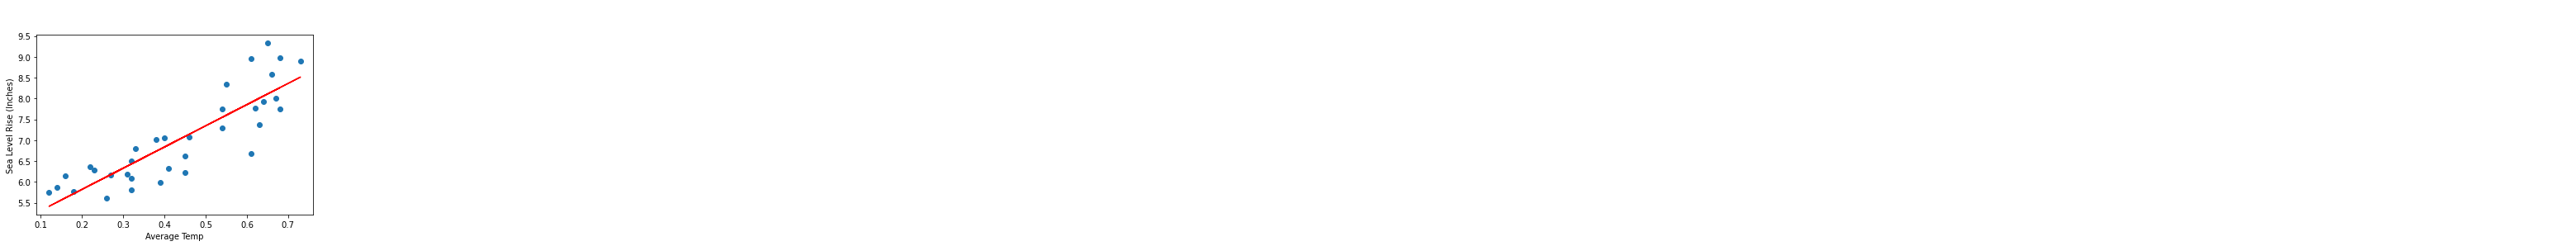

In [60]:
#Sea Level Rise Regression Analysis by Temperature
x_values = slr_merged_by_year['Average Temp']
y_values = slr_merged_by_year['Sea Level Rise (Inches)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Temp')
plt.ylabel('Sea Level Rise (Inches)')
print(f"The r-squared is: {rvalue**2}")
plt.show()